# first we have to import libraries

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data  = pd.read_csv("billionaire.csv")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [5]:
data.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Industry'], dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=2755, step=1)

In [9]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


# data modification

In [10]:
data['NetWorths'] = data['NetWorth'].replace({'\$': '', 'B': ''}, regex=True).astype(float)
data

,Name,NetWorth,Country,Source,Rank,Age,Industry,NetWorths
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0
...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,1.0
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1.0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1.0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1.0


# description of data

In [11]:
data.describe()

,Rank,Age,NetWorths
count,2755.000000,2676.000000,2755.000000
mean,1345.663521,63.113602,4.749220
std,772.669811,13.445153,9.615358
min,1.000000,18.000000,1.000000
25%,680.000000,54.000000,1.500000
50%,1362.000000,63.000000,2.300000
75%,2035.000000,73.000000,4.200000
max,2674.000000,99.000000,177.000000


In [12]:
data.Rank.value_counts()

2524    150
2378    146
2141    122
2263    115
2035    106
       ... 
93        1
94        1
95        1
98        1
154       1
Name: Rank, Length: 245, dtype: int64

In [14]:
data['absolute_rank'] = data.index+1
data

,Name,NetWorth,Country,Source,Rank,Age,Industry,NetWorths,absolute_rank
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0,1
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0,2
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0,3
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0,4
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0,5
...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,1.0,2751
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1.0,2752
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1.0,2753
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1.0,2754


In [44]:
data['Country'].unique()


array(['United States', 'France', 'India', 'Spain', 'China', 'Mexico',
       'Japan', 'Canada', 'Germany', 'Italy', 'Hong Kong', 'Russia',
       'Austria', 'Australia', 'Chile', 'Singapore', 'Sweden',
       'Indonesia', 'Thailand', 'Czechia', 'United Kingdom', 'Brazil',
       'Netherlands', 'Ireland', 'South Korea', 'Denmark', 'Malaysia',
       'Nigeria', 'Israel', 'Colombia', 'Switzerland', 'Cyprus',
       'Belgium', 'New Zealand', 'Egypt', 'South Africa', 'Ukraine',
       'Greece', 'Vietnam', 'Philippines', 'Taiwan', 'Finland', 'Norway',
       'Turkey', 'Argentina', 'Romania', 'Liechtenstein', 'Peru',
       'Georgia', 'Algeria', 'Portugal', 'Eswatini (Swaziland)',
       'Kazakhstan', 'Poland', 'United Arab Emirates', 'Venezuela',
       'Macao', 'Guernsey', 'Lebanon', 'Oman', 'Iceland', 'Monaco',
       'Morocco', 'Slovakia', 'Qatar', 'Tanzania', 'St. Kitts and Nevis',
       'Zimbabwe', 'Hungary', 'Nepal'], dtype=object)

# let analyse "Domain with the greatest number of Billionaires"

In [45]:
topnation = data.Country.value_counts()
topnation.head()

United States    724
China            626
India            140
Germany          136
Russia           118
Name: Country, dtype: int64

In [57]:
catagory=data.groupby('Source')['NetWorths'].agg(["sum", "min", "max",'count','mean'])
catagory=catagory.sort_values(by='max',ascending=False)
catagory=catagory[catagory['count']>5]
catagory

,sum,min,max,count,mean
Source,,,,,
Facebook,142.4,1.7,97.0,7,20.342857
software,275.8,1.0,93.0,62,4.448387
diversified,378.2,1.1,84.5,85,4.449412
telecom,126.4,1.0,62.8,18,7.022222
Walmart,220.2,7.2,61.8,7,31.457143
...,...,...,...,...,...
machinery,14.7,1.0,3.8,9,1.633333
logistics,13.7,1.3,3.1,7,1.957143
medical technology,13.4,1.3,3.1,8,1.675000


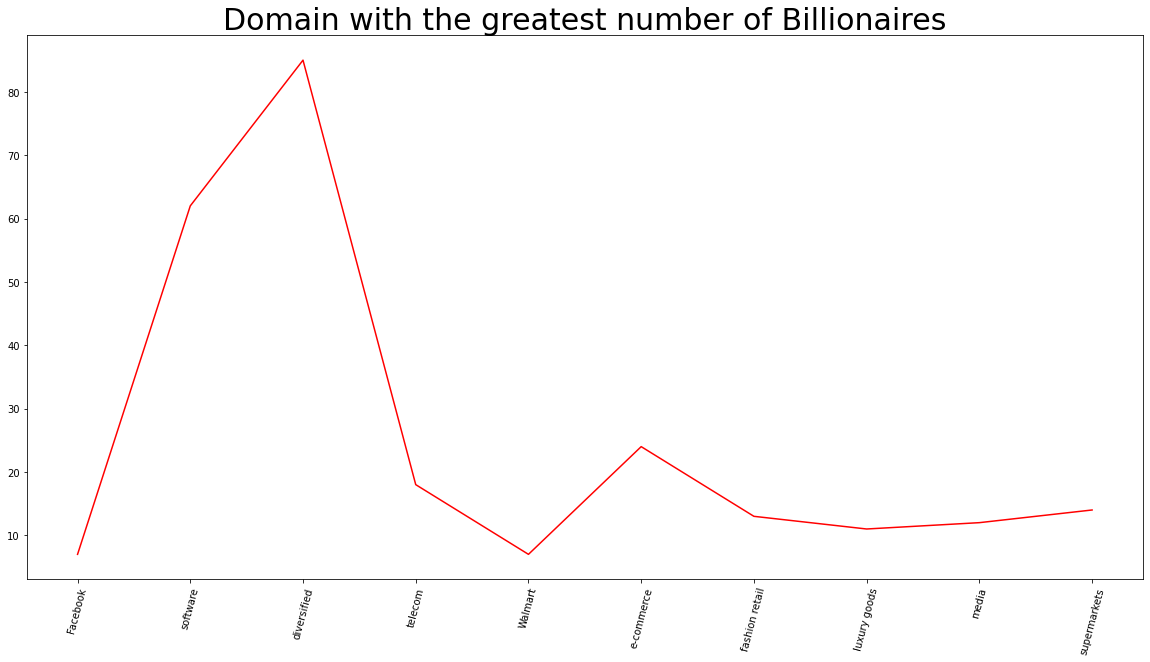

In [58]:
z =  catagory
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)

plt.plot(z.index[:10],z['count'][:10], color = 'red');
plt.title("Domain with the greatest number of Billionaires", fontsize = 30, color = 'black');


# Top 10 country with most billionaires

In [60]:
country=data[data.Source=='real estate'].groupby('Country').Name.count()
country.sort_values(ascending=False)

Country
China                   51
United States           33
Hong Kong               28
Russia                   9
India                    8
Singapore                5
Australia                5
Germany                  4
Canada                   4
Taiwan                   4
United Kingdom           3
Japan                    3
Thailand                 2
Sweden                   2
Slovakia                 1
United Arab Emirates     1
Czechia                  1
Cyprus                   1
Indonesia                1
Philippines              1
Norway                   1
Macao                    1
Israel                   1
Netherlands              1
Name: Name, dtype: int64

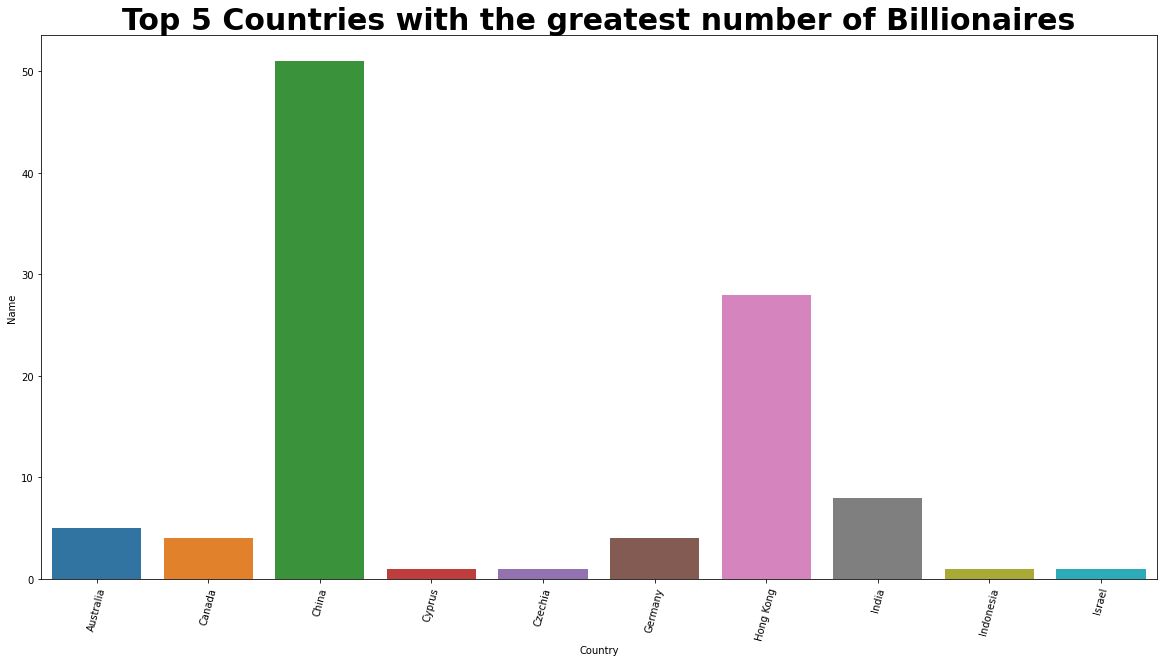

In [61]:
z = country
plt.figure(figsize=(20, 10))
plt.xticks(rotation=75)
sns.barplot(y=z[:10], x=z.index[:10]);
plt.title("Top 5 Countries with the greatest number of Billionaires", fontweight = "bold", fontsize = "30");

In [64]:
data

,Name,NetWorth,Country,Source,Rank,Age,Industry,NetWorths,absolute_rank
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0,1
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0,2
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0,3
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0,4
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0,5
...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,1.0,2751
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1.0,2752
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1.0,2753
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1.0,2754


# Industry with the greatest number of billionaire

In [63]:
industry=data.groupby('Industry')['NetWorths'].agg(["sum", "min", "max",'count','mean'])
industry=industry.sort_values(by='max',ascending=False)
indusrty=industry[industry['count']>5]
industry

,sum,min,max,count,mean
Industry,,,,,
Technology,2456.7,1.0,177.0,365,6.730685
Automotive,467.5,1.0,151.0,68,6.875000
Fashion & Retail,1697.6,1.0,150.0,273,6.218315
Finance & Investments,1527.9,1.0,96.0,371,4.118329
Diversified,868.1,1.0,84.5,188,4.617553
Food & Beverage,1029.9,1.0,68.9,219,4.702740
Telecom,209.4,1.0,62.8,32,6.543750
Media & Entertainment,481.3,1.0,59.0,95,5.066316
Service,248.7,1.0,39.0,75,3.316000


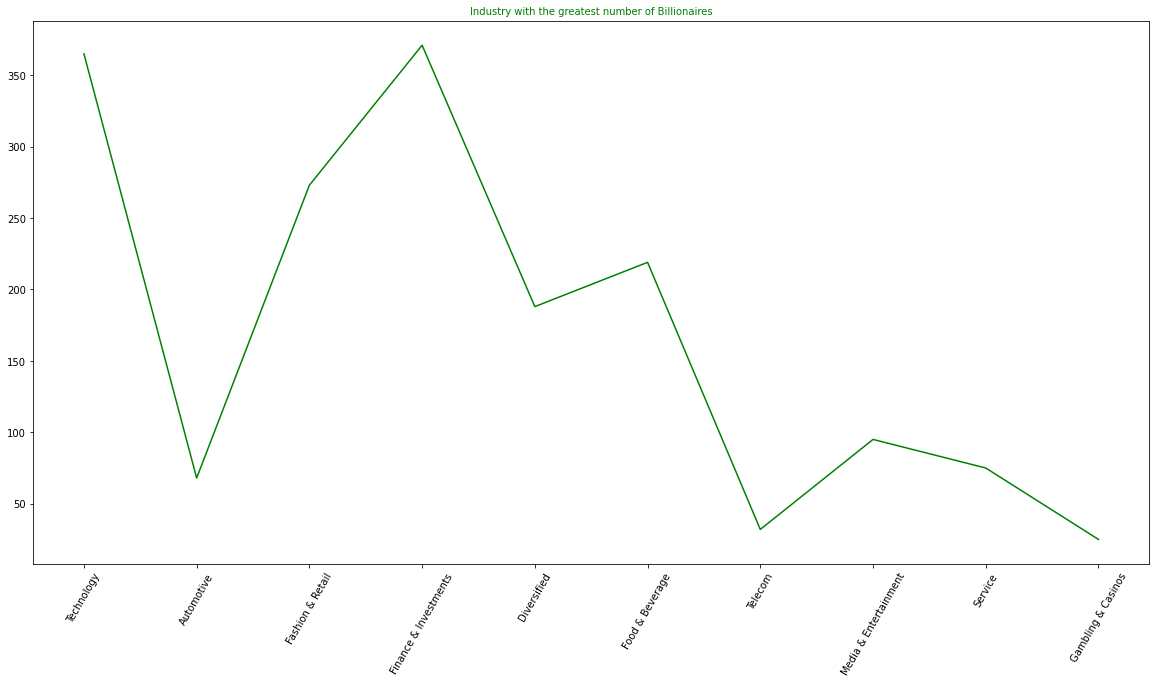

In [66]:
z =  industry
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)

plt.plot(z.index[:10],z['count'][:10], color = 'green');

plt.title("Industry with the greatest number of Billionaires", fontsize = 25, font = ' bold', color = 'green');
